In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
file_path = "Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [6]:
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2 

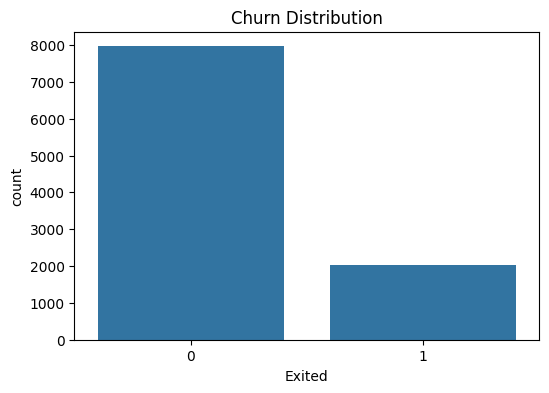

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()

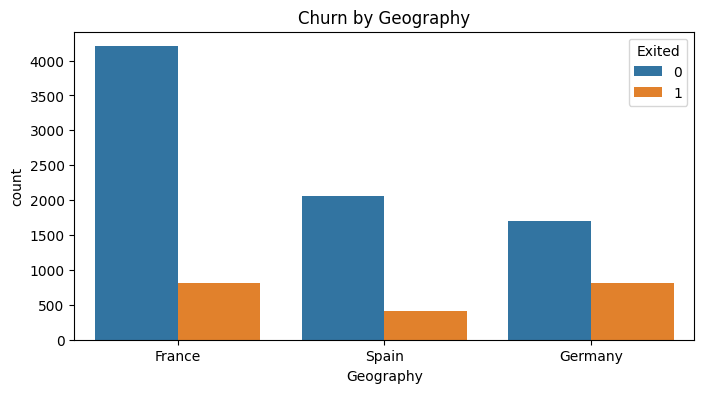

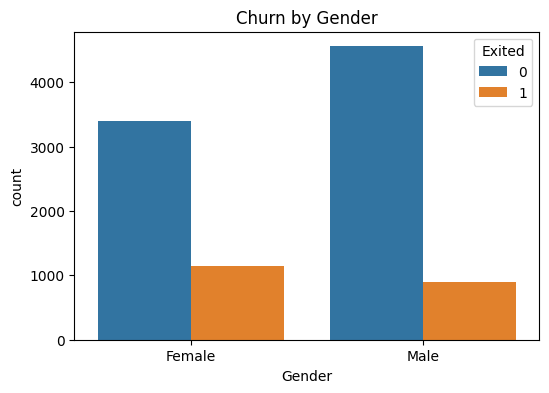

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Churn by Geography")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Churn by Gender")
plt.show()

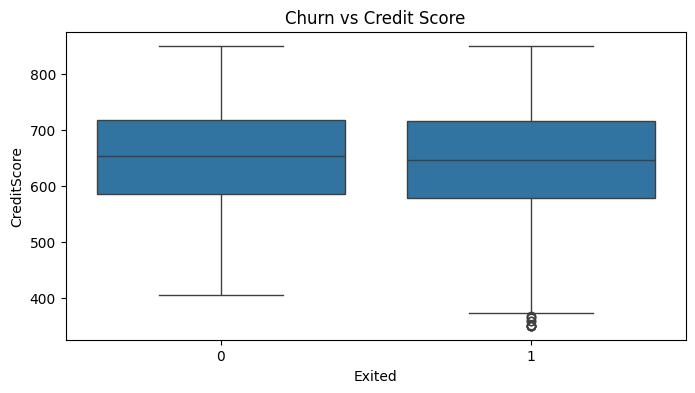

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Churn vs Credit Score")
plt.show()

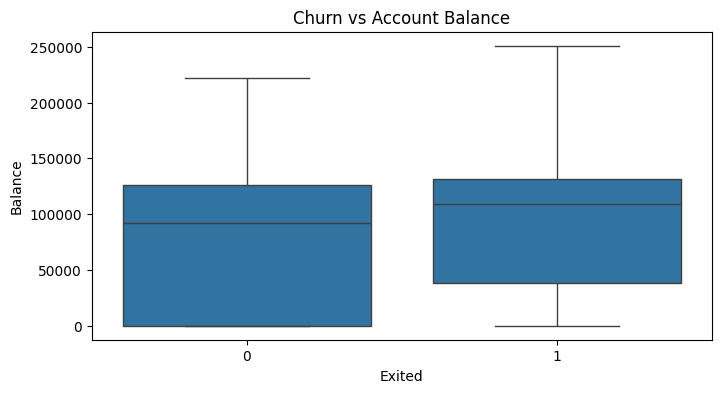

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Churn vs Account Balance")
plt.show()

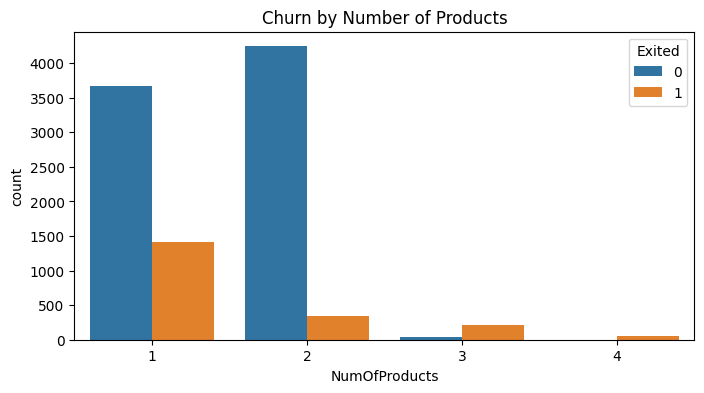

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

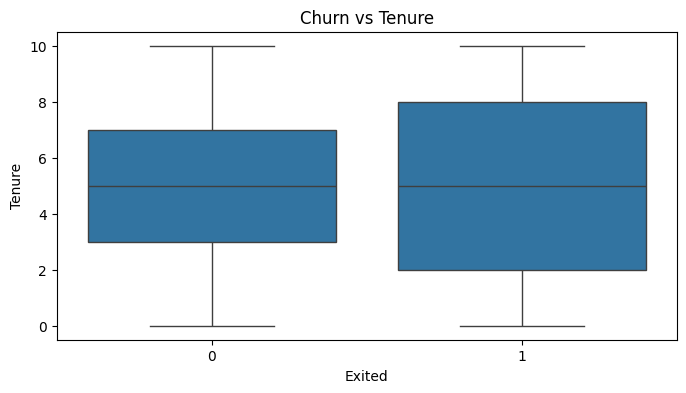

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Exited", y="Tenure", data=df)
plt.title("Churn vs Tenure")
plt.show()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


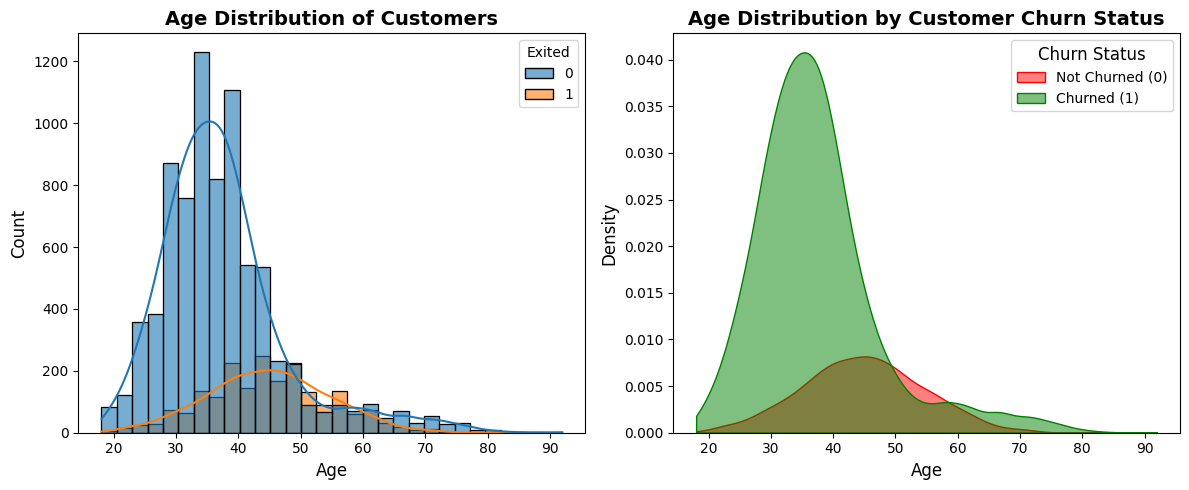

In [13]:
print(df["Age"].describe())

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x="Age",hue="Exited", kde=True, bins=30, color="royalblue",
             edgecolor="black", alpha=0.6, ax=ax[0])

ax[0].set_xlabel("Age", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[0].set_title("Age Distribution of Customers", fontsize=14, fontweight="bold")


sns.kdeplot(data=df, x="Age", hue="Exited", cut=0, fill=True,
            palette={0: "green", 1: "red"}, alpha=0.5, ax=ax[1])

ax[1].set_xlabel("Age", fontsize=12)
ax[1].set_ylabel("Density", fontsize=12)
ax[1].set_title("Age Distribution by Customer Churn Status", fontsize=14, fontweight="bold")
legend = ax[1].legend(title="Exited", labels=["Not Churned (0)", "Churned (1)"], fontsize=10)
legend.set_title("Churn Status", prop={"size": 12})

plt.tight_layout()
plt.show()

<ipython-input-14-12f1837e013d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x="Exited", y="Age", palette="coolwarm", linewidth=1.5)


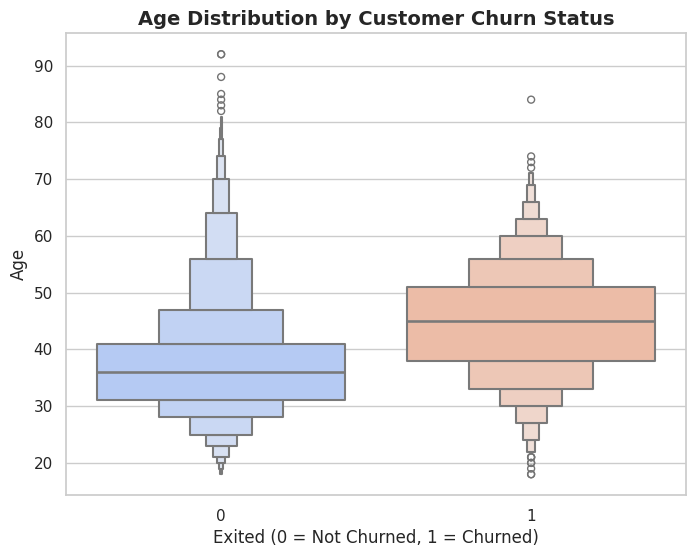

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.boxenplot(data=df, x="Exited", y="Age", palette="coolwarm", linewidth=1.5)

plt.xlabel("Exited (0 = Not Churned, 1 = Churned)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Age Distribution by Customer Churn Status", fontsize=14, fontweight="bold")

plt.show()

In [15]:
def hist(data, title, xlable):
    plt.figure(figsize=(10, 6))
    sns.histplot(x=data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.6,hue=df["Exited"])
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

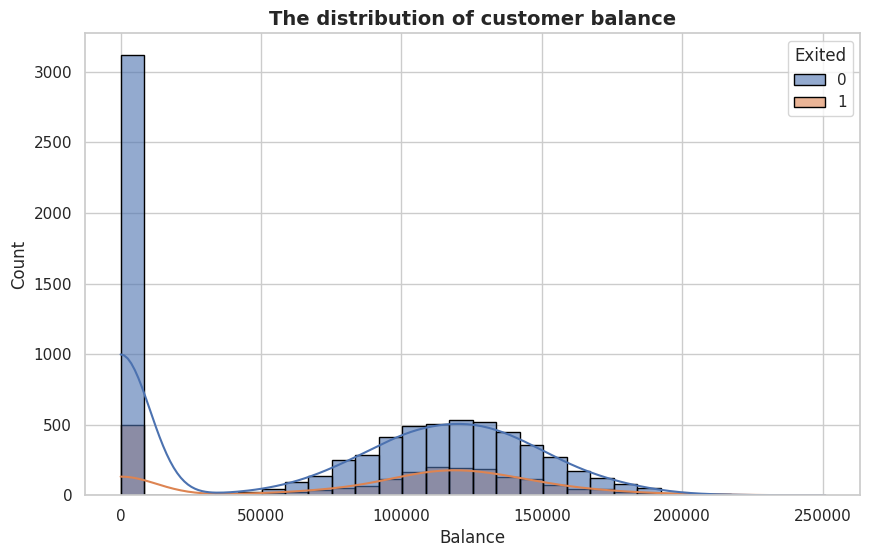

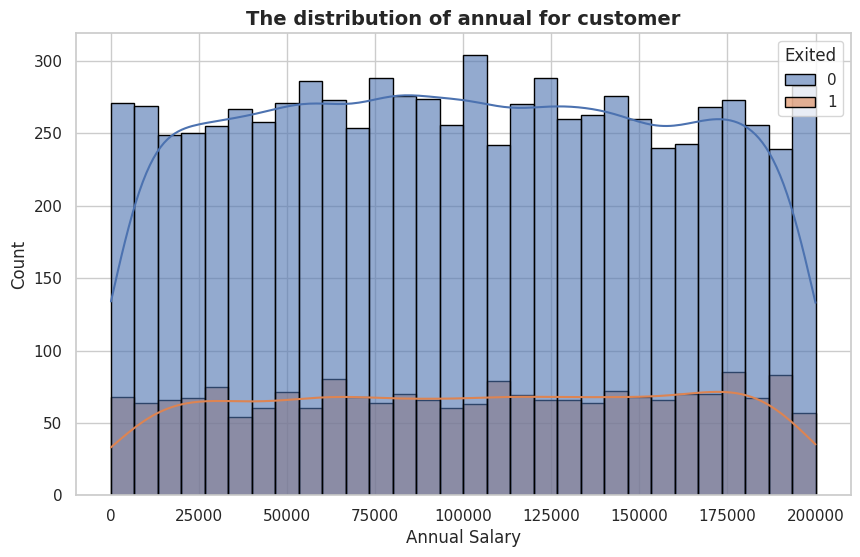

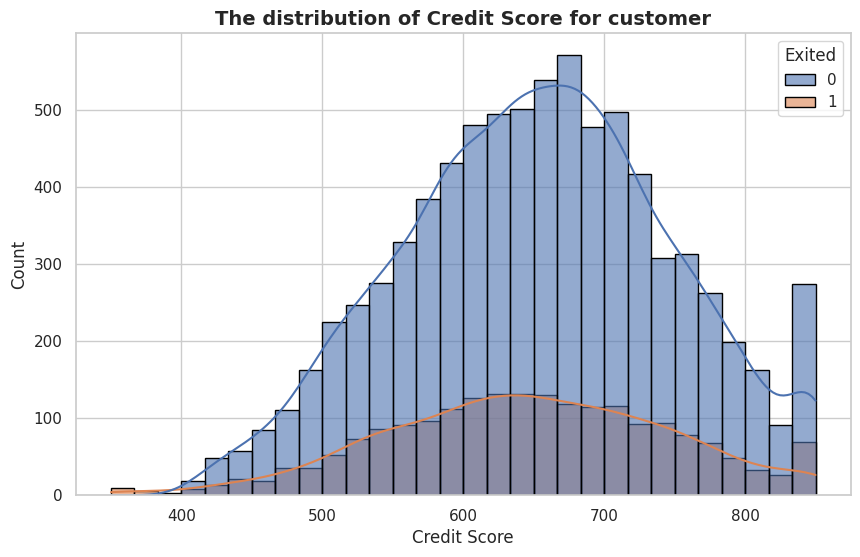

In [16]:
hist(df["Balance"],"The distribution of customer balance","Balance")
hist(df["EstimatedSalary"], "The distribution of annual for customer","Annual Salary")
hist(df["CreditScore"], "The distribution of Credit Score for customer","Credit Score")

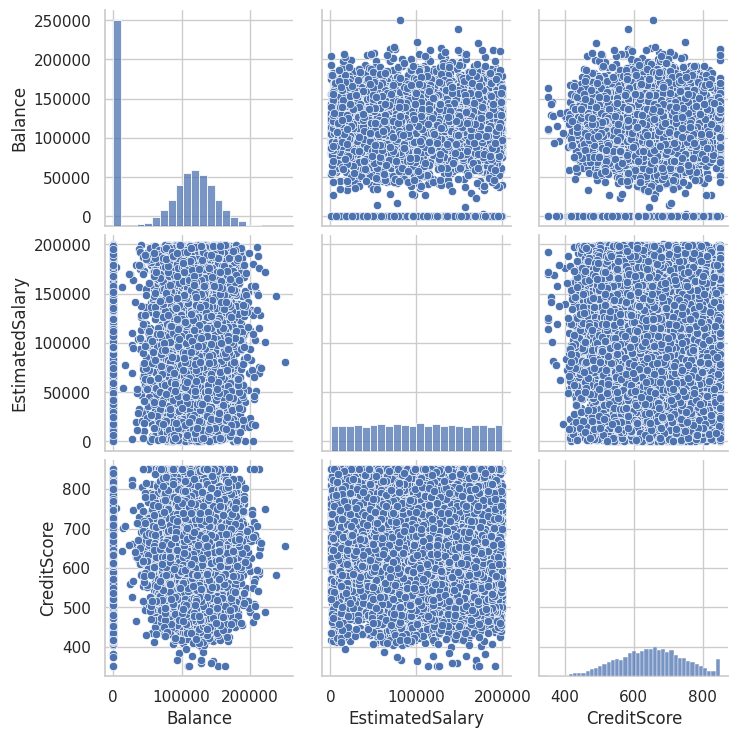

In [17]:
sns.pairplot(df[["Balance", "EstimatedSalary", "CreditScore"]])
plt.show()

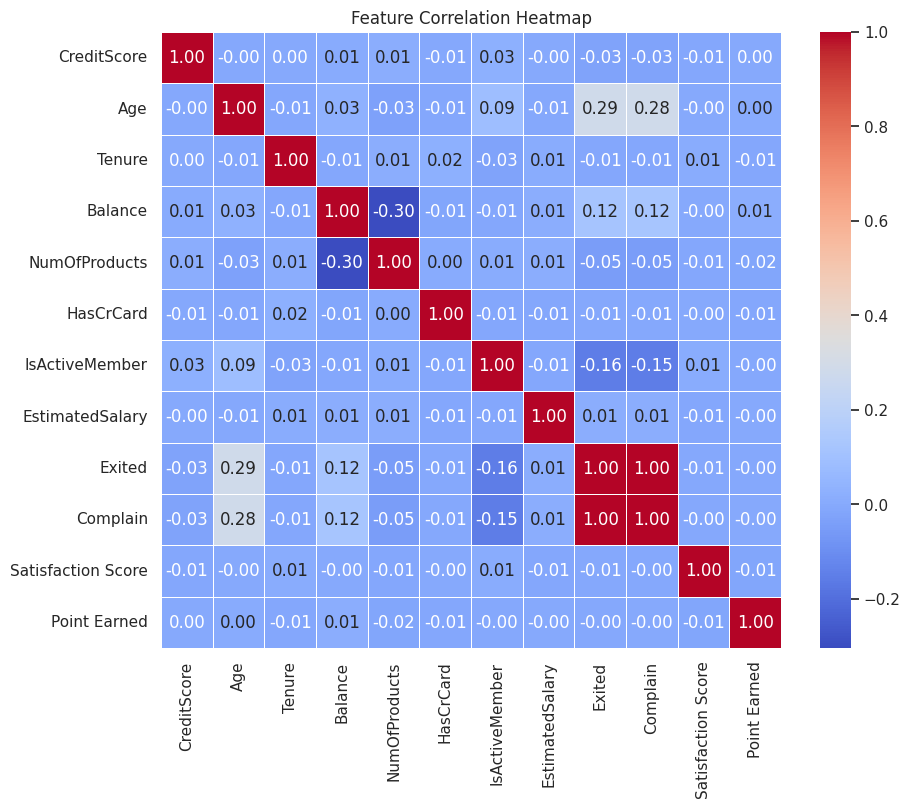

In [18]:
plt.figure(figsize=(10, 8))
corr = df.drop(["Geography", "Gender", "Card Type"], axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
print(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [20]:
from sklearn.preprocessing import StandardScaler
column_for_scaling = ["Age", "Balance", "EstimatedSalary", "CreditScore"]
missing_cols = [col for col in column_for_scaling if col not in df.columns]
if missing_cols:
    print(f"Warning: Columns missing from dataset: {missing_cols}")
else:
    scaler = StandardScaler()
    df[column_for_scaling] = scaler.fit_transform(df[column_for_scaling])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  float64
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  float64
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.1+ 

In [21]:
Customer_data_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
Customer_data_encoded.drop(["Card Type","HasCrCard"],axis=1,inplace=True)

In [22]:
X = Customer_data_encoded.drop(["Exited"], axis=1)
Y = Customer_data_encoded["Exited"]
x_train,x_test,y_train,y_test = train_test_split(X,Y, stratify=Y,random_state=123,test_size=.20)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_logreg = log_reg.predict(x_test)
print("Logistic Regression Performance:")
print(accuracy_score(y_test, y_pred_logreg))

Logistic Regression Performance:
0.9985


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
